### Ran at following tags
MagD https://github.com/pnsn/magD/tree/v1.1

magd_client https://github.com/pnsn/magd_client/tree/v1.1

# Noise Study to compare current and notional EEW station geometry

In [37]:
from magD.magD import MagD
from magD.pickle import get_pickle
import os

# some constants for all plots

# path to local libraries
magd_client_path = '/Users/joncon/Sites/magd_client/'
pickle_path = magd_client_path + "/pickle_jar"
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())

# params for all profiles
lat_min = 38.0
lat_max = 52.0
lon_min = -130.0
lon_max = -115.0
resolution = 0.1
num_solutions = 4
nyquist_correction = 0.4
mu = 3e11
qconst = 300.0
beta = 3.5

# create all data sources icons can be changed without rebuilding magD object
data_srcs = {'existing_bb':
             {
                 'csv_path': 'csv/2019_eew/existing_bb.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'Yellow',
                 'symbol': '^',
                 'size': 50,
                 'label': "Existing BB",
                 'unit': 'Mw',
                 'klass': 'scnl'
             },
             'existing_sm':
             {
                 'csv_path': 'csv/2019_eew/existing_sm.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'blue',
                 'symbol': 'o',
                 'size': 50,
                 'unit': 'Mw',
                 'label': "Existing SM",
                 'klass': 'scnl'
             },
             'current':
             {
                 'csv_path': 'csv/2019_eew/current.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'yellow',
                 'symbol': '^',
                 'size': 50,
                 'unit': 'Mw',
                 'label': "Existing SM",
                 'klass': 'scnl'
             }
             }


def make_grid(grid_type, src, lat_min=lat_min, lat_max=lat_max, lon_min=lon_min, lon_max=lon_max):
    grid = MagD(grid_type, name, resolution, lat_min, lat_max, lon_min, lon_max, 
                num_solutions, pickle_path, nyquist_correction, mu, qconst, beta)
    grid.build_markers(src)
    grid.build_origins()
    grid.build_matrix()
    grid.save()
    return grid


Working in /Users/joncon/Sites/magd_client


In [26]:
# only run once
# set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Station data

### Existing EEW contributing stations

ShakeAlert Coordinator provided two xls files, one current west coast eew, one notional west coast eew. Both files were edited in Numbers, where the SM and BB channels we're filtered to unique files:

* ./csv/2019_eew/existing_bb.csv 
* ./csv/2019_eew/existing_sm.csv
* ./csv/2019_eew/notional_bb.csv
* ./csv/2019_eew/notional_sm.csv

Headers were changed as needed:
* sta
* chan
* net
* location
* lat
* lon
* rate

## Create and save MagD

### Existing Broadbands

In [32]:
name = "2019_eew_existing_bb"
grid_type = 'detection'

existing_bb_src = {}
existing_bb_src['existing_bb'] = data_srcs['existing_bb']
%time grid_eew_existing_bb = make_grid(grid_type, existing_bb_src)
print(grid_eew_existing_bb.get_path())

JRO:BHZ:--:CC startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
COR:BHZ:0:IU startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
BMO:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
HAWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NEW:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NLWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
WVOR:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
LON:BHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:HHZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TREE:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
12 channel(s) found without noise pdf
Profiling by noise...
lat

### Existing Strong Motion

In [34]:
# Performance 47 minutes
# refactor 1 46 mins
name = "2019_eew_existing_sm"
grid_type = 'detection'

existing_sm_src = {}
existing_sm_src['existing_sm'] = data_srcs['existing_sm']
%time grid_eew_existing_sm = make_grid(grid_type, existing_sm_src)
print(grid_eew_existing_sm.get_path())

JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
CPW:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
GSM:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MBPA:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MEGW:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PGO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PSNS:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TAKO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TBPA:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TKCO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TOLO:ENZ:--:UW startime: 2019-01-01, endtime 2019-03-31

KeyboardInterrupt: 

### Existing all

In [38]:
# performance 1 hour 4 min
# refactor 1 hour 4 min
name = "2019_eew_existing_all"
grid_type = 'detection'

src = {}
#combine both bb and sm
src['current'] = data_srcs['current']
%time grid_eew_existing_all = make_grid(grid_type, src)
print(grid_eew_existing_all.get_path())

JRO:BHZ:--:CC startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
COR:BHZ:0:IU startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
BMO:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
HAWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NEW:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NLWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
WVOR:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
LON:BHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:HHZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TREE:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returne

## Detection Maps

### Instantiate MagD objects
If needed, instantiate runs from above. This is useful when kernel has been restarted or mapping is done at a later time. Paths come from stdout from above runs. Ensure this path is updated if MagD is reran at different resolution.

In [10]:
# performance before refactor:
# Refactor 1
# 13 seconds
# 36 seconds
# 50 seconds
%time grid_eew_existing_bb = get_pickle( \
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_bb/detection_grid/140x150-res-0.1.pickle")
%time grid_eew_existing_sm = get_pickle( \
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_sm/detection_grid/140x150-res-0.1.pickle")
%time grid_eew_existing_all = get_pickle( \
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_all/detection_grid/140x150-res-0.1.pickle")

CPU times: user 418 ms, sys: 32.6 ms, total: 450 ms
Wall time: 453 ms
CPU times: user 493 ms, sys: 15.7 ms, total: 509 ms
Wall time: 511 ms
CPU times: user 498 ms, sys: 18.5 ms, total: 516 ms
Wall time: 518 ms


### Existing Broadband


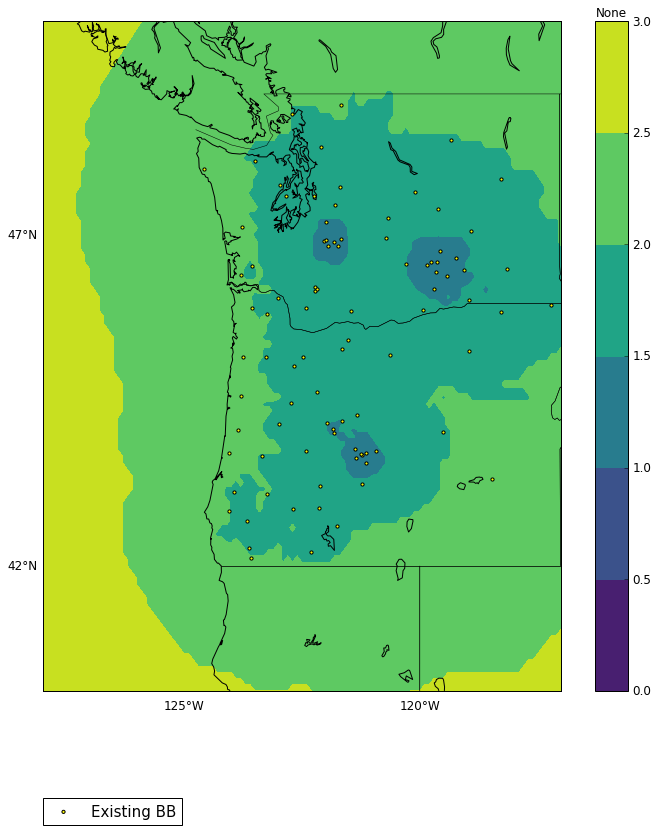

In [22]:
path = grid_eew_existing_bb.get_path()

%run -i scripts/plot_heatmap.py \
--path=$path \
--plotwidth=60 \
--plotstas=True \
--color=viridis \
--levels=0,0.5,1,1.5,2,2.5,3
    
# --title1 = 'Magnitude Detection Thresholds' \
# --title2 = 'All Existing PNSN Broadbands' \
# --title3 = 'Four station detection' \

## Existing Strong Motion

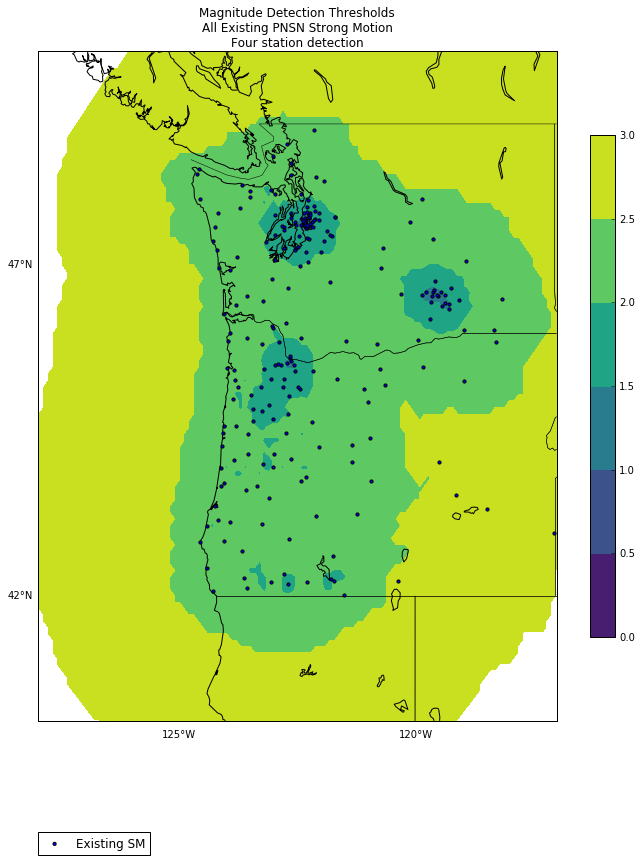

CPU times: user 3.37 s, sys: 41.7 ms, total: 3.41 s
Wall time: 3.41 s


In [39]:
# Performance : 51 sec
path = grid_eew_existing_sm.get_path()
%time % run - i scripts / plot_heatmap.py \
    - -path =$path \
    - -title1 = 'Magnitude Detection Thresholds' \
    - -title2 = 'All Existing PNSN Strong Motion' \
    - -title3 = 'Four station detection' \
    - -plotwidth = 60 \
    - -plotstas = True \
    - -plotwidth = 15 \
    - -color = viridis \
    - -levels = 0, 0.5, 1, 1.5, 2, 2.5, 3

## Existing All

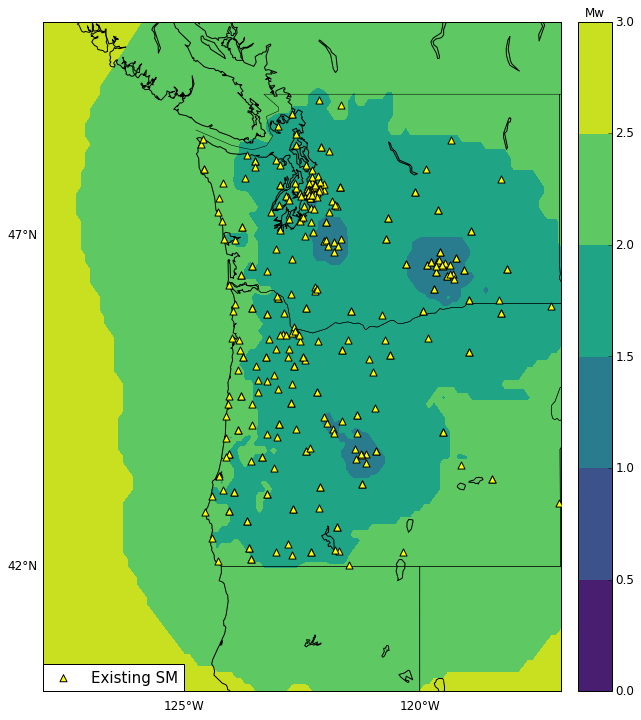

CPU times: user 2.9 s, sys: 38 ms, total: 2.93 s
Wall time: 2.94 s


In [81]:
# Performance 1.5 minutes
path = grid_eew_existing_all.get_path()

%time %run -i scripts/plot_heatmap.py \
--path=$path \
--plotwidth=60 \
--plotstas=True \
--plotwidth=15 \
--color=viridis \
--legend_pad=0.0 \
--colorbar_pad=0.02 \
--levels=0,0.5,1,1.5,2,2.5,3

#--title1='Magnitude Detection Thresholds' \
#--title2='All Existing PNSN Strong Motion and Broadbands' \
#--title3='Four station detection' \

### Diff SM - all
Increase in performance using SM

Clone one grid and then set clones grid to diff of other two

In [39]:
# PERFORMANCE before solution refactor
# 14 mins
#  2 sec
# 40 sec

# After solution refactor: 11 min

%time grid_eew_existing_diff = grid_eew_existing_all.copy("existing_diff", "diff_all_sm")
%time grid_eew_existing_diff.matrix = grid_eew_existing_sm.matrix - grid_eew_existing_all.matrix
%time grid_eew_existing_diff.save()
print(grid_eew_existing_diff.get_path())

CPU times: user 1.85 s, sys: 17.3 ms, total: 1.87 s
Wall time: 1.87 s
CPU times: user 225 µs, sys: 124 µs, total: 349 µs
Wall time: 211 µs
CPU times: user 262 ms, sys: 10.4 ms, total: 273 ms
Wall time: 276 ms
/Users/joncon/Sites/magd_client//pickle_jar/diff_all_sm/existing_diff_grid/140x150-res-0.1.pickle


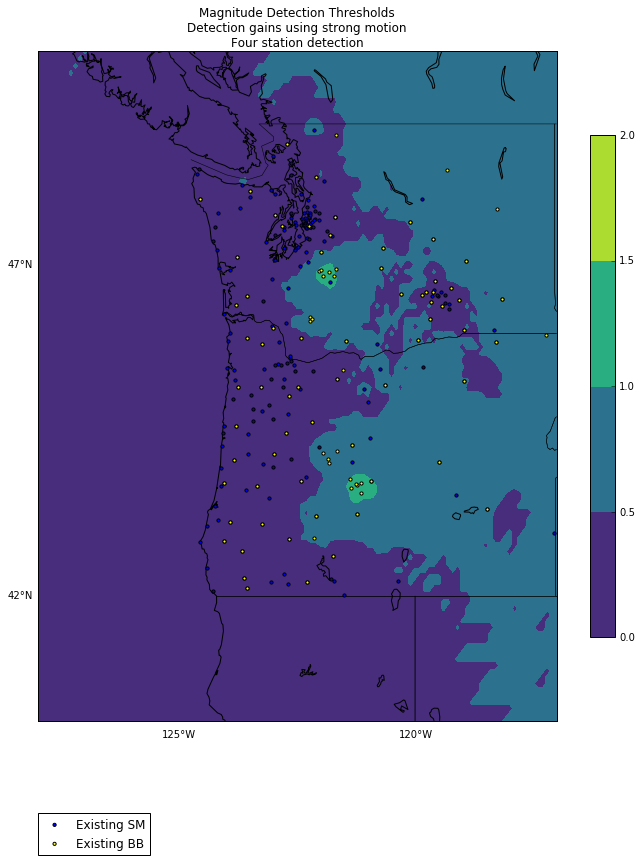

CPU times: user 3.22 s, sys: 35.4 ms, total: 3.25 s
Wall time: 3.25 s


In [43]:
# Perfomance 2 min 18 sec
path = grid_eew_existing_diff.get_path()

%time %run -i scripts/plot_heatmap.py \
--path =$path \
--title1='Magnitude Detection Thresholds' \
--title2='Detection gains using strong motion' \
--title3='Four station detection' \
--plotwidth=60 \
--plotstas=True \
--plotwidth=15 \
--color=viridis \
--levels=0,0.5,1,1.5,2

# Find a good station 
Look for station used in highest number of solutions for a proxy for future stations

In [117]:
scnls = grid_eew_existing_all.productive_scnls()
l = len(scnls)
percentile =round((l - l*.95))
print(percentile)

16


In [120]:
contribs = [s.contrib_solutions for s in scnls]
template = scnls[percentile]
print(template.sta + ":" + template.chan +
      ":" + template.loc + ":" + template.net)

TUCA:HHZ:--:UW


In [121]:
data_srcs['notional'] = {
    'csv_path': 'csv/2019_eew/notional.csv',
    'starttime': '2019-01-01',
    'endtime': '2019-03-31',
    'color': 'red',
    'symbol': '^',
    'size': 50,
    'label': 'Notional',
    'klass': 'scnl',
    'unit': 'Mw',
    'template_sta': template.sta,
    'template_chan': template.chan,
    'template_net': template.net,
    'template_loc': template.loc
}

In [122]:
# use the template pdf from above to as proxy for notional stations
name = "2019_eew_notional"
grid_type = 'detection'

src = {}
src['notional'] = data_srcs['notional']

%time grid_eew_notional = make_grid(grid_type, src)
print(grid_eew_notional.get_path())

Profiling by noise...
lat: 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, Feel the noise!
CPU times: user 9min 49s, sys: 904 ms, total: 9min 50s
Wall time: 9min 51s
/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_notional/detection_grid/140x150-res-0.1.pickle


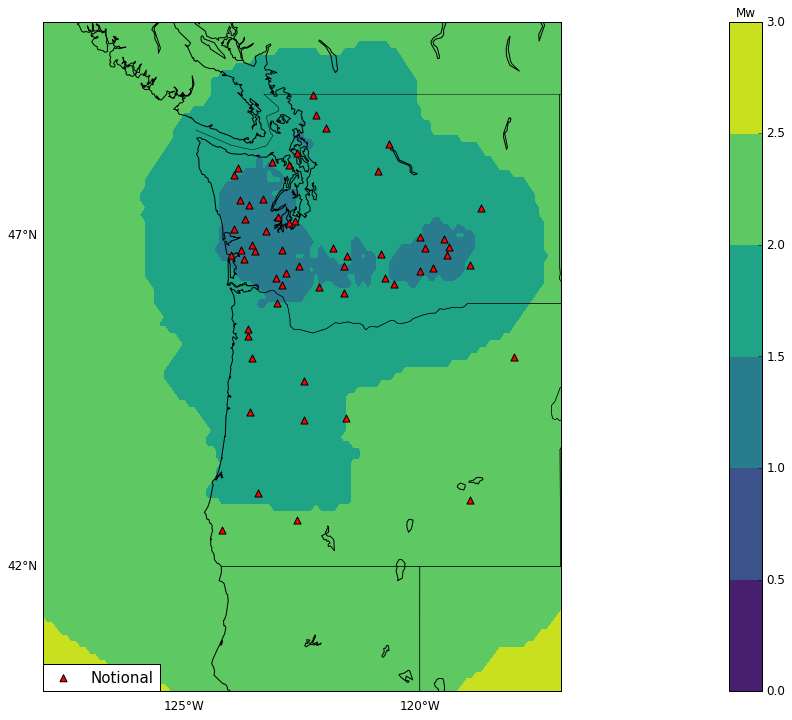

CPU times: user 2.85 s, sys: 40.5 ms, total: 2.89 s
Wall time: 2.9 s


In [124]:
# Perfomance 2 min 18 sec
path = grid_eew_notional.get_path()

%time % run -i scripts/plot_heatmap.py \
--path=$path \
--plotwidth=60 \
--plotstas=True \
--plotwidth=15 \
--color=viridis \
--levels=0,0.5,1,1.5,2,2.5,3
    
#--title1='Magnitude Detection Thresholds' \
#--title2='Notional stations' \
#--title3='Four station detection' \

In [125]:
# use the template pdf from above to as proxy for notional stations
name = "2019_eew_existing_and_notional"
grid_type = 'detection'

src = {}
src['current'] = data_srcs['current']
src['notional'] = data_srcs['notional']
%time grid_eew_existing_and_notional = make_grid(grid_type, src)
print(grid_eew_existing_and_notional.get_path())

JRO:BHZ:--:CC startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
COR:BHZ:0:IU startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
BMO:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
HAWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NEW:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
NLWA:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
WVOR:BHZ:0:US startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
LON:BHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:HHZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
MRBL:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
PASS:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
TREE:HHZ:--:UW startime: 2019-01-01, endtime 2019-03-31 returned HTTP code 404
JESE:ENZ:--:UO startime: 2019-01-01, endtime 2019-03-31 returne

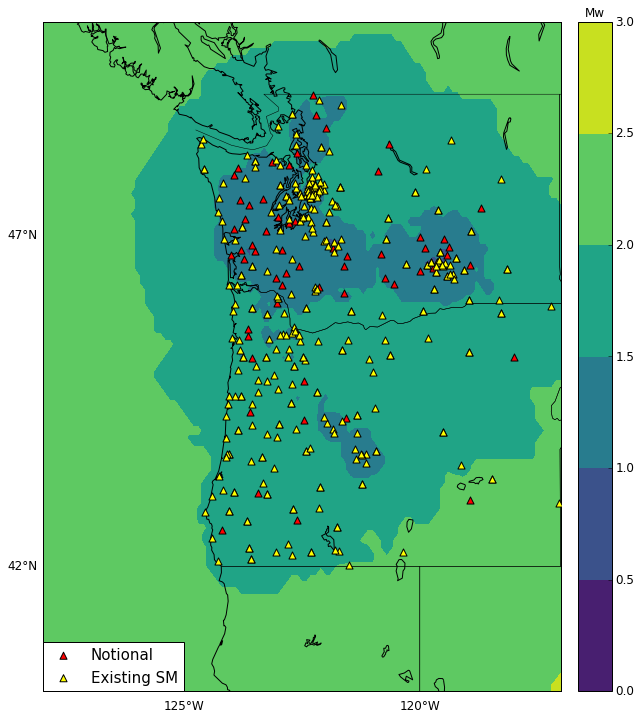

CPU times: user 5.62 s, sys: 95.6 ms, total: 5.72 s
Wall time: 5.79 s


In [93]:
grid_eew_existing_and_notional = get_pickle( \
    "/Users/joncon/Sites/magd_client//pickle_jar/2019_eew_existing_and_notional/detection_grid/140x150-res-0.1.pickle")
# Perfomance 2 min 18 sec
path = grid_eew_existing_and_notional.get_path()

%time %run -i scripts/plot_heatmap.py \
--path=$path \
--plotwidth=60 \
--plotstas=True \
--plotwidth=15 \
--color=viridis \
--levels=0,0.5,1,1.5,2,2.5,3 \
--legend_pad=-0 \
--colorbar_pad=0.02

# --title1='Magnitude Detection Thresholds' \
# --title2='Existing and Notional stations' \
# --title3='Four station detection' \

In [103]:
%time grid_eew_existing_and_notional_diff = grid_eew_existing_and_notional.copy("diff_all_and_notional", "diff_all_and_notional")
%time grid_eew_existing_and_notional_diff.matrix = grid_eew_existing_all.matrix - grid_eew_existing_and_notional.matrix
%time grid_eew_existing_and_notional_diff.save()
print(grid_eew_existing_and_notional_diff.get_path())

CPU times: user 2.17 s, sys: 8.44 ms, total: 2.18 s
Wall time: 2.18 s
CPU times: user 194 µs, sys: 53 µs, total: 247 µs
Wall time: 209 µs
CPU times: user 266 ms, sys: 9.02 ms, total: 275 ms
Wall time: 278 ms
/Users/joncon/Sites/magd_client//pickle_jar/diff_all_and_notional/diff_all_and_notional_grid/140x150-res-0.1.pickle


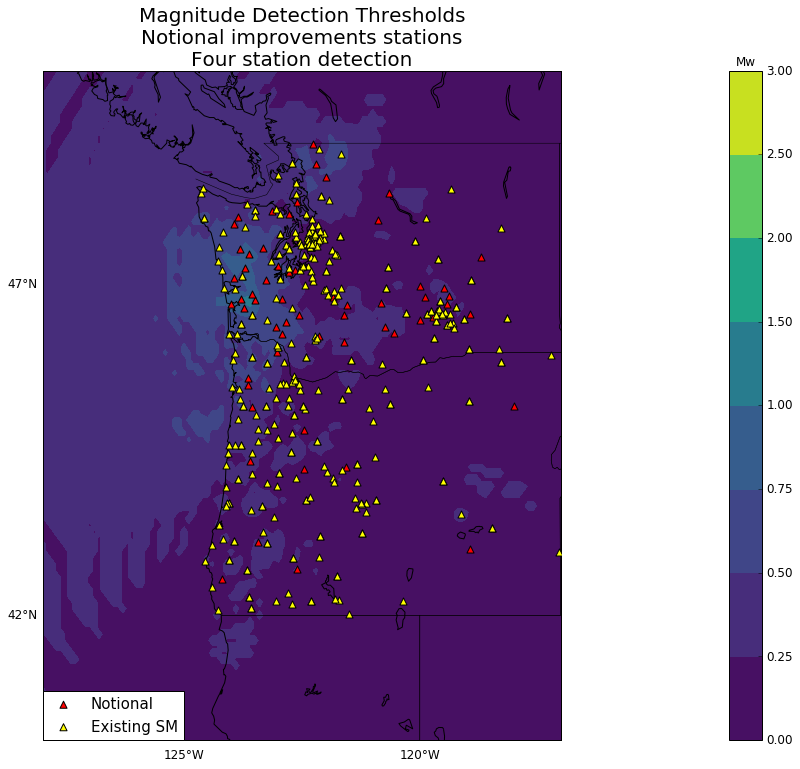

CPU times: user 3.44 s, sys: 40 ms, total: 3.48 s
Wall time: 3.48 s


In [123]:
# Perfomance 2 min 18 sec
path = grid_eew_existing_and_notional_diff.get_path()

%time %run -i scripts/plot_heatmap.py \
    --path=$path \
    --title1='Magnitude Detection Thresholds' \
    --title2='Notional improvements stations' \
    --title3='Four station detection' \
    --plotwidth=60 \
    --plotstas=True \
    --plotwidth=15 \
    --color=viridis \
    --levels=0,0.25,0.5,0.75,1,1.5,2,2.5,3